In [1]:
import requests
from citipy import citipy 

# Import the API key.
from config import weather_api_key

from datetime import datetime
import numpy as np
import time
import pandas as pd

In [2]:
#Prepare Coordinates

def generateLats_longs(size):
    
    latitudes = np.random.uniform(-90,90,size)
    longitudes = np.random.uniform(-180,180,size)

    return zip(latitudes,longitudes)

In [13]:
#intialise a city series object
city_Data= []

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


coordinates=  generateLats_longs(1500)
cities =[]

for coordinate in coordinates:
    cities.append(citipy.nearest_city(coordinate[0], coordinate[1]).city_name)

print(len(cities))


for i , city in enumerate(cities):
    
     # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(city_url)
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_Data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except BaseException as e:
        print(e)        
        print("City not found. Skipping..." + city)
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
# print(city_url)
print(city_Data)

Beginning Data Retrieval     
-----------------------------
1500
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=punta+arenas
Processing Record 1 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=vaini
Processing Record 2 of Set 1 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=sudak
Processing Record 3 of Set 1 | sudak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=qaanaaq
Processing Record 4 of Set 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=kahului
Processing Record 5 of Set 1 | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=yellowknife
Processing Record 6 of Set 1 | yellowknife
http://api.openweathermap

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ushuaia
Processing Record 4 of Set 2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ilulissat
Processing Record 5 of Set 2 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=mar+del+plata
Processing Record 6 of Set 2 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=busselton
Processing Record 7 of Set 2 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=mareeba
Processing Record 8 of Set 2 | mareeba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=mandalgovi
Processing Record 9 of Set 2 | mandalgovi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=bingol
Processing Record 7 of Set 3 | bingol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=champerico
Processing Record 8 of Set 3 | champerico
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ushuaia
Processing Record 9 of Set 3 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=punta+arenas
Processing Record 10 of Set 3 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=sao+caitano
Processing Record 11 of Set 3 | sao caitano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ushuaia
Processing Record 12 of Set 3 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=longyearbyen
Processing Record 9 of Set 4 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=camana
Processing Record 10 of Set 4 | camana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=east+london
Processing Record 11 of Set 4 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=attawapiskat
Processing Record 12 of Set 4 | attawapiskat
'coord'
City not found. Skipping...attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=sterling
Processing Record 13 of Set 4 | sterling
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=punta+arenas
Processing Record 14 of Set 4 | punta arenas
http://ap

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=pangnirtung
Processing Record 12 of Set 5 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=illoqqortoormiut
Processing Record 13 of Set 5 | illoqqortoormiut
'coord'
City not found. Skipping...illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=tasiilaq
Processing Record 14 of Set 5 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ushuaia
Processing Record 15 of Set 5 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=leningradskiy
Processing Record 16 of Set 5 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=port+keats
Processing Record 17 of Set 5 | port ke

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=huntington
Processing Record 14 of Set 6 | huntington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=saint-augustin
Processing Record 15 of Set 6 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=bubaque
Processing Record 16 of Set 6 | bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=wahran
Processing Record 17 of Set 6 | wahran
'coord'
City not found. Skipping...wahran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=sur
Processing Record 18 of Set 6 | sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=mingaora
Processing Record 19 of Set 6 | mingaora
http://api.openweathermap.org/data/2.5/w

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=merauke
Processing Record 17 of Set 7 | merauke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=coquimbo
Processing Record 18 of Set 7 | coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=sinnamary
Processing Record 19 of Set 7 | sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=butaritari
Processing Record 20 of Set 7 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=nikolskoye
Processing Record 21 of Set 7 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=tomatlan
Processing Record 22 of Set 7 | tomatlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=vostok
Processing Record 21 of Set 8 | vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=lebu
Processing Record 22 of Set 8 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=port+lincoln
Processing Record 23 of Set 8 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=grindavik
Processing Record 24 of Set 8 | grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=barentsburg
Processing Record 25 of Set 8 | barentsburg
'coord'
City not found. Skipping...barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=kavieng
Processing Record 26 of Set 8 | kavieng
http://api.openweathermap.org/dat

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=rikitea
Processing Record 23 of Set 9 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=busselton
Processing Record 24 of Set 9 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=kirakira
Processing Record 25 of Set 9 | kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=sao+felix+do+xingu
Processing Record 26 of Set 9 | sao felix do xingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=katsuura
Processing Record 27 of Set 9 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=zhigansk
Processing Record 28 of Set 9 | zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=sheltozero
Processing Record 26 of Set 10 | sheltozero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=illoqqortoormiut
Processing Record 27 of Set 10 | illoqqortoormiut
'coord'
City not found. Skipping...illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=atuona
Processing Record 28 of Set 10 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=bluff
Processing Record 29 of Set 10 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=carnarvon
Processing Record 30 of Set 10 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=campbell+river
Processing Record 31 of Set 10 | campbell river


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ushuaia
Processing Record 29 of Set 11 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=sao+joao+da+barra
Processing Record 30 of Set 11 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=magadan
Processing Record 31 of Set 11 | magadan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=norman+wells
Processing Record 32 of Set 11 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=taolanaro
Processing Record 33 of Set 11 | taolanaro
'coord'
City not found. Skipping...taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=punta+arenas
Processing Record 34 of Set 11 | punta arenas

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=chicama
Processing Record 30 of Set 12 | chicama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=souillac
Processing Record 31 of Set 12 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=vila+franca+do+campo
Processing Record 32 of Set 12 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=punta+arenas
Processing Record 33 of Set 12 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=oftersheim
Processing Record 34 of Set 12 | oftersheim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=butaritari
Processing Record 35 of Set 12 | butaritari
http://api.openweathermap.org/data/2.5

Processing Record 30 of Set 13 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=hermanus
Processing Record 31 of Set 13 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=georgetown
Processing Record 32 of Set 13 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=tazovskiy
Processing Record 33 of Set 13 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=san+ramon
Processing Record 34 of Set 13 | san ramon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=puro
Processing Record 35 of Set 13 | puro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=tawkar
Processing Record 36 of Set 13 | tawkar
'coord'
City not found. Skipping...t

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=yellowknife
Processing Record 34 of Set 14 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=port+alfred
Processing Record 35 of Set 14 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=yambio
Processing Record 36 of Set 14 | yambio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=nisia+floresta
Processing Record 37 of Set 14 | nisia floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=torbay
Processing Record 38 of Set 14 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=jizan
Processing Record 39 of Set 14 | jizan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=lebu
Processing Record 38 of Set 15 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=severo-kurilsk
Processing Record 39 of Set 15 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=imeni+lva+tolstogo
Processing Record 40 of Set 15 | imeni lva tolstogo
'coord'
City not found. Skipping...imeni lva tolstogo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=darnah
Processing Record 41 of Set 15 | darnah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=batticaloa
Processing Record 42 of Set 15 | batticaloa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=gravdal
Processing Record 43 of Set 15 | gravdal


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=arraial+do+cabo
Processing Record 41 of Set 16 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=lyudinovo
Processing Record 42 of Set 16 | lyudinovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=khatanga
Processing Record 43 of Set 16 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=kichera
Processing Record 44 of Set 16 | kichera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=port+hedland
Processing Record 45 of Set 16 | port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=hobart
Processing Record 46 of Set 16 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imper

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=luau
Processing Record 44 of Set 17 | luau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=grand+river+south+east
Processing Record 45 of Set 17 | grand river south east
'coord'
City not found. Skipping...grand river south east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=petropavlovsk-kamchatskiy
Processing Record 46 of Set 17 | petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=san+cristobal
Processing Record 47 of Set 17 | san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=severnoye
Processing Record 48 of Set 17 | severnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=att

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=rikitea
Processing Record 46 of Set 18 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=grand+river+south+east
Processing Record 47 of Set 18 | grand river south east
'coord'
City not found. Skipping...grand river south east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=bengkulu
Processing Record 48 of Set 18 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ushuaia
Processing Record 49 of Set 18 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=norman+wells
Processing Record 50 of Set 18 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=takoradi
Processing Record 1 of Set 1

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=east+london
Processing Record 48 of Set 19 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=khandyga
Processing Record 49 of Set 19 | khandyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=cayenne
Processing Record 50 of Set 19 | cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=sakaiminato
Processing Record 1 of Set 20 | sakaiminato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=luwuk
Processing Record 2 of Set 20 | luwuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=el+alto
Processing Record 3 of Set 20 | el alto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7e

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=iqaluit
Processing Record 1 of Set 21 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=sinnamary
Processing Record 2 of Set 21 | sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=bredasdorp
Processing Record 3 of Set 21 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=husavik
Processing Record 4 of Set 21 | husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=thompson
Processing Record 5 of Set 21 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=inhambane
Processing Record 6 of Set 21 | inhambane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=kudahuvadhoo
Processing Record 3 of Set 22 | kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=punta+arenas
Processing Record 4 of Set 22 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=kapaa
Processing Record 5 of Set 22 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=severo-kurilsk
Processing Record 6 of Set 22 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=saint+george
Processing Record 7 of Set 22 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=bredasdorp
Processing Record 8 of Set 22 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?u

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ushuaia
Processing Record 4 of Set 23 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=mataura
Processing Record 5 of Set 23 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=kavieng
Processing Record 6 of Set 23 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=mataura
Processing Record 7 of Set 23 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=qaanaaq
Processing Record 8 of Set 23 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=carmen
Processing Record 9 of Set 23 | carmen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a59

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=nikolskoye
Processing Record 8 of Set 24 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=okha
Processing Record 9 of Set 24 | okha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=bluff
Processing Record 10 of Set 24 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=kaitangata
Processing Record 11 of Set 24 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=los+llanos+de+aridane
Processing Record 12 of Set 24 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=mataura
Processing Record 13 of Set 24 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperia

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=aklavik
Processing Record 12 of Set 25 | aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=cherskiy
Processing Record 13 of Set 25 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=gram
Processing Record 14 of Set 25 | gram
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=vaini
Processing Record 15 of Set 25 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=attawapiskat
Processing Record 16 of Set 25 | attawapiskat
'coord'
City not found. Skipping...attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=mar+del+plata
Processing Record 17 of Set 25 | mar del plata
http://api.openweathermap.

'coord'
City not found. Skipping...nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=punta+arenas
Processing Record 14 of Set 26 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=quatre+cocos
Processing Record 15 of Set 26 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=albany
Processing Record 16 of Set 26 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=harnosand
Processing Record 17 of Set 26 | harnosand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=hilo
Processing Record 18 of Set 26 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=new+norfolk
Processing Record 19 of Set 26 | new norfolk
http://api.openwe

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ushuaia
Processing Record 16 of Set 27 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=yeppoon
Processing Record 17 of Set 27 | yeppoon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=ketchikan
Processing Record 18 of Set 27 | ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=marjamaa
Processing Record 19 of Set 27 | marjamaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=pevek
Processing Record 20 of Set 27 | pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=illoqqortoormiut
Processing Record 21 of Set 27 | illoqqortoormiut
'coord'
City not found. Skipping...illoqqortoormiut
http://api.openw

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=turayf
Processing Record 17 of Set 28 | turayf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=deniliquin
Processing Record 18 of Set 28 | deniliquin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=barentsburg
Processing Record 19 of Set 28 | barentsburg
'coord'
City not found. Skipping...barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=thompson
Processing Record 20 of Set 28 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=khormuj
Processing Record 21 of Set 28 | khormuj
'coord'
City not found. Skipping...khormuj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=pimentel
Processing Record 22 of 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=maragogi
Processing Record 20 of Set 29 | maragogi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=nha+trang
Processing Record 21 of Set 29 | nha trang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=belushya+guba
Processing Record 22 of Set 29 | belushya guba
'coord'
City not found. Skipping...belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=palmer
Processing Record 23 of Set 29 | palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=awbari
Processing Record 24 of Set 29 | awbari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=saint-philippe
Processing Record 25 of Set 29 | saint-philippe
http://api.

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=hilo
Processing Record 23 of Set 30 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=yanam
Processing Record 24 of Set 30 | yanam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=cabo+san+lucas
Processing Record 25 of Set 30 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=saskylakh
Processing Record 26 of Set 30 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=barrow
Processing Record 27 of Set 30 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7ee9136a5d76166634a5973d6&q=hambantota
Processing Record 28 of Set 30 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da251a7

In [4]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_Data)
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.4833,-151.7500,78.82,74,6,17.45,PF,2022-09-22 20:43:31
1,Olginskaya,47.1879,39.9492,66.94,56,90,6.08,RU,2022-09-22 20:43:32
2,Baiquan,47.5833,126.0833,53.73,93,100,8.90,CN,2022-09-22 20:43:32
3,Hermanus,-34.4187,19.2345,55.80,77,41,21.65,ZA,2022-09-22 20:43:32
4,San Rafael,-34.6177,-68.3301,67.21,17,15,11.36,AR,2022-09-22 20:42:23
5,Tiksi,71.6872,128.8694,28.49,91,100,11.59,RU,2022-09-22 20:44:33
6,New Norfolk,-42.7826,147.0587,53.92,90,100,1.28,AU,2022-09-22 20:44:34
7,Provideniya,64.3833,-173.3000,44.71,87,100,7.00,RU,2022-09-22 20:44:34
8,Yellowknife,62.4560,-114.3525,61.32,59,40,17.27,CA,2022-09-22 20:44:35
9,Butaritari,3.0707,172.7902,80.83,75,97,9.48,KI,2022-09-22 20:45:35


In [5]:
# Reorder column for better visualisation
column_rearrange = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed']


city_data_df = city_data_df[column_rearrange]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Faanui,PF,2022-09-22 20:43:31,-16.4833,-151.7500,78.82,74,6,17.45
1,Olginskaya,RU,2022-09-22 20:43:32,47.1879,39.9492,66.94,56,90,6.08
2,Baiquan,CN,2022-09-22 20:43:32,47.5833,126.0833,53.73,93,100,8.90
3,Hermanus,ZA,2022-09-22 20:43:32,-34.4187,19.2345,55.80,77,41,21.65
4,San Rafael,AR,2022-09-22 20:42:23,-34.6177,-68.3301,67.21,17,15,11.36
5,Tiksi,RU,2022-09-22 20:44:33,71.6872,128.8694,28.49,91,100,11.59
6,New Norfolk,AU,2022-09-22 20:44:34,-42.7826,147.0587,53.92,90,100,1.28
7,Provideniya,RU,2022-09-22 20:44:34,64.3833,-173.3000,44.71,87,100,7.00
8,Yellowknife,CA,2022-09-22 20:44:35,62.4560,-114.3525,61.32,59,40,17.27
9,Butaritari,KI,2022-09-22 20:45:35,3.0707,172.7902,80.83,75,97,9.48


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

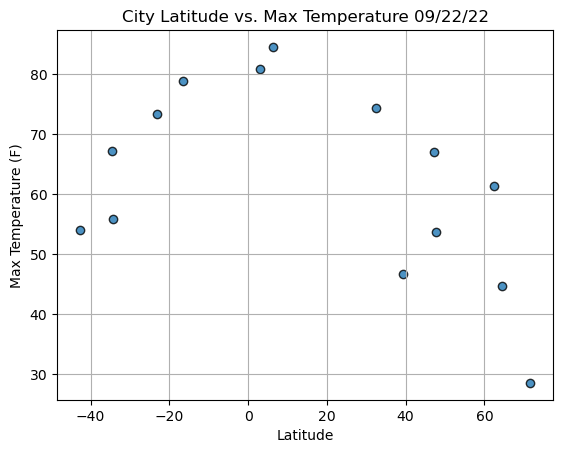

In [14]:
# Import time module
import time
import matplotlib.pyplot as plt
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

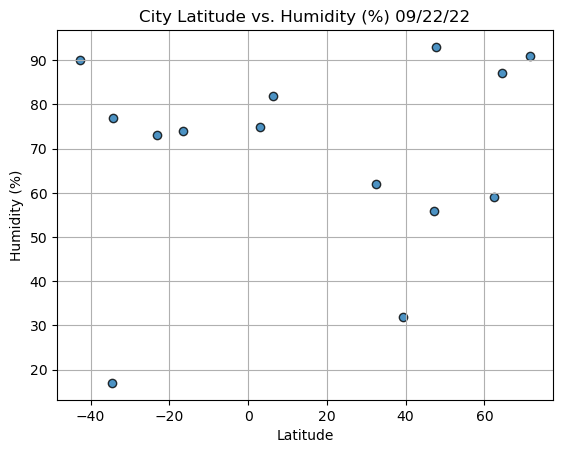

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humiditydity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

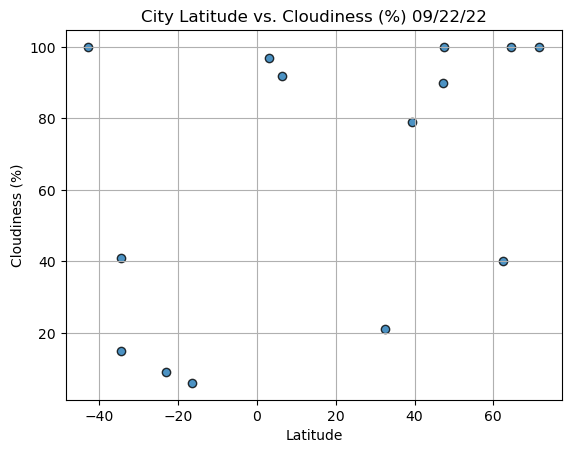

In [18]:
plt.scatter(lats,
            cloudinessessessess,
            edgecolor ="black" ,linewidths =1,marker='o',
            alpha=0.8, label ="Cities"
            )


plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

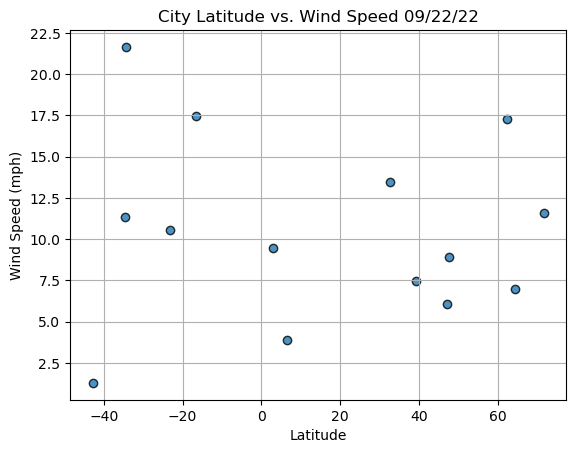

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()